# Modelo Auto ARIMA - Estudos Part27 Séries Temporais
* Encontrando o melhor modelo de forma automatizada
* Um modelo muito poderoso e mais intuitivo

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)

C:\estudos_coleta_dados\virtualenv\estudos_dados\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [5]:
from pmdarima.arima import auto_arima

In [8]:
stepwise_model = auto_arima(data, start_p=1, start_q=1, max_p=6, max_q=6, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True,
                           error_action='ignore', suppress_warnings=True, stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.05 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1030.752, Time=0.13 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1032.276, Time=0.42 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1030.408, Time=0.09 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.29 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=1034.096, Time=0.79 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.24 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=2.67 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=3.04 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1020.639, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.23 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1019.494, Time=0.65 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.14 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1020.327, Time=0.57 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1012.991, Time=1.94 sec
 ARIM

In [9]:
print(stepwise_model.aic())

1012.9907965241745


In [10]:
# separando os dados entre treino e teste
train = data.loc['1948-01-01':'1959-12-01']
test  = data.loc['1960-01-01':]

In [11]:
stepwise_model.fit(train)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [12]:
future_forecast = stepwise_model.predict(n_periods=12)

In [13]:
future_forecast = pd.DataFrame(future_forecast, index=test.index, columns=['#Passengers'])

<AxesSubplot:xlabel='Month'>

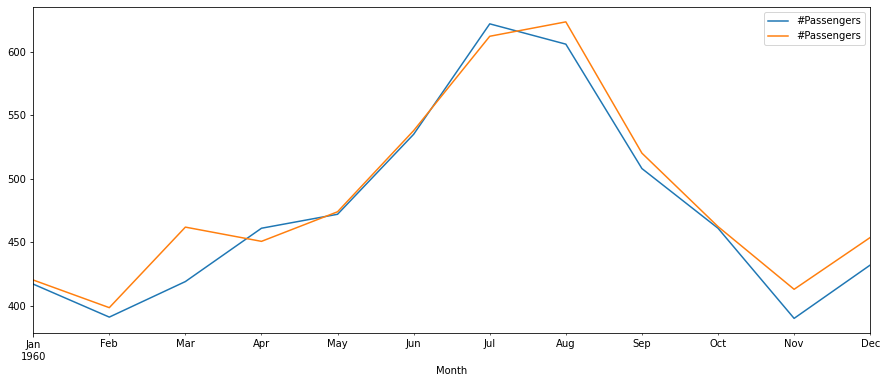

In [14]:
pd.concat([test, future_forecast], axis=1).plot()

<AxesSubplot:xlabel='Month'>

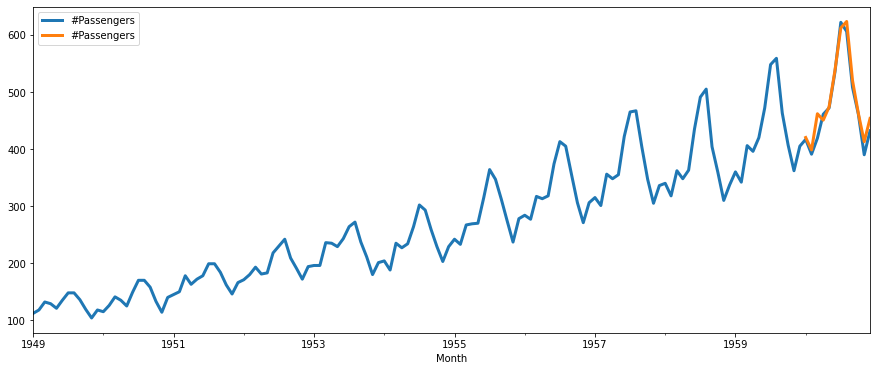

In [16]:
pd.concat([data, future_forecast], axis=1).plot(linewidth=3)